In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from mlchecks.checks import Dataset
from mlchecks.base.suite import CheckSuite
from mlchecks.suites import *

In [3]:
from urllib.request import urlopen

# Adult dataset

## load datasets

In [4]:
name_data = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names')
lines = [l.decode("utf-8") for l in name_data if ':' in l.decode("utf-8") and '|' not in l.decode("utf-8")]

features = [l.split(':')[0] for l in lines]
label_name = 'income'

cat_features = [l.split(':')[0] for l in lines if 'continuous' not in l]

train_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names=features + [label_name])
val_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      names=features + [label_name], skiprows=1)

In [5]:
train_df.shape

(32561, 15)

In [6]:
train_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
val_df.shape

(16281, 15)

In [8]:
val_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [9]:
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

## Build model

In [10]:
from catboost import CatBoostClassifier

In [11]:
model = CatBoostClassifier(cat_features=cat_features)

In [12]:
model.fit(train_df[features], train_df[label_name], silent=True)

## Run suites

In [13]:
train_ds = Dataset(train_df, label=label_name, cat_features=cat_features)
val_ds = Dataset(val_df, label=label_name, cat_features=cat_features)

In [14]:
IntegrityCheckSuite.checks[0].checks[-2].__dict__

{'params': {}}

In [15]:
IntegrityCheckSuite.run(model=model, train_dataset=train_ds, validation_dataset=val_ds, check_datasets_policy='both')

Integrity Suite

Single Dataset Integrity Suite

Single Value in Column - Train Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Single Value in Column - Validation Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Mixed Nulls - Train Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Nulls - Validation Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Types - Train Dataset

Search for mixed types of Data in a single column[s].

✓ Nothing found

Mixed Types - Validation Dataset

Search for mixed types of Data in a single column[s].

✓ Nothing found

String Mismatch - Train Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

Value 
 Count 
 % In data 
 
 
 Column Name 
 Base form 
   
   
   
 
 
 
 
 income 
 50k 
 >50K 
 7841 
 1.61% 
 
 
 50k 
 <=50K 
 24720 
 5.06%

String Mismatch - Validation Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

Value 
 Count 
 % In data 
 
 
 Column Name 
 Base form 
   
   
   
 
 
 
 
 income 
 50k 
 >50K. 
 3846 
 1.57% 
 
 
 50k 
 <=50K. 
 12435 
 5.09%

Data Duplicates - Train Dataset

Search for Data duplicates in dataset.

0.07% of data samples are duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
Number of Duplicates,,,,,,,,,,,,,,,
3,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
2,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
2,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
2,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K


Data Duplicates - Validation Dataset

Search for Data duplicates in dataset.

0.03% of data samples are duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
Number of Duplicates,,,,,,,,,,,,,,,
2,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.
2,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
2,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
2,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
2,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.


Special Characters - Train Dataset

Search in column[s] for values that contains only special characters.

,% Special-Only Samples,Most Common Special-Only Samples
Column Name,,
workclass,5.64%,[' ?']
occupation,5.66%,[' ?']
native-country,1.79%,[' ?']


Special Characters - Validation Dataset

Search in column[s] for values that contains only special characters.

,% Special-Only Samples,Most Common Special-Only Samples
Column Name,,
workclass,5.91%,[' ?']
occupation,5.93%,[' ?']
native-country,1.68%,[' ?']


Comparative Integrity Suite

String Mismatch Comparison

Detect different variants of string categories between the same categorical column in two datasets.

Column name,income
Base form,50k
Common variants,[]
Variants only in dataset,"[' >50K.', ' <=50K.']"
% Unique variants out of all dataset samples (count),100% (16281)
Variants only in baseline,"[' >50K', ' <=50K']"
% Unique variants out of all baseline samples (count),100% (32561)


#### Sweet! We found out that labels are not the same. Fix and run again

In [16]:
val_fixed_df = val_df.copy()
val_fixed_df[label_name] = val_fixed_df[label_name].str[:-1]
val_ds = Dataset(val_fixed_df, label=label_name, cat_features=cat_features)
val_fixed_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [17]:
from mlchecks.checks import StringMismatchComparison

In [18]:
StringMismatchComparison().run(val_ds, train_ds)

String Mismatch Comparison

Detect different variants of string categories between the same categorical column in two datasets.

✓ Nothing found

In [19]:
from mlchecks.suites import LeakageCheckSuite

In [20]:
LeakageCheckSuite.checks

(DataSampleLeakageReport({}),
 DateTrainValidationLeakageDuplicates({}),
 DateTrainValidationLeakageOverlap({}),
 IndexTrainValidationLeakage({}),
 SingleFeatureContributionTrainValidation({}))

#### We cant run this - we don't have date and index. Create a smaller suite

In [21]:
DateIndexLessLeakageCheckSuite = CheckSuite('Date-less Index-less Leakage Suite',
                                            LeakageCheckSuite.checks[0],
                                            LeakageCheckSuite.checks[-1])
DateIndexLessLeakageCheckSuite

Date-less Index-less Leakage Suite [DataSampleLeakageReport({}),SingleFeatureContributionTrainValidation({})]

Date-less Index-less Leakage Suite

Data Sample Leakage Report

Find what percent of the validation data is in the train data.

0.15% (25 / 16276) of validation data samples appear in train data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
test indexes: 24667,17,Private,153021,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
validation indexes: 4152,17,Private,153021,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
test indexes: 10094,19,?,167428,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
validation indexes: 8116,19,?,167428,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
test indexes: 3118,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
validation indexes: 1668,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
test indexes: 22249,19,Private,139466,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
validation indexes: 6456,19,Private,139466,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
test indexes: 14690,19,Private,318822,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
validation indexes: 14398,19,Private,318822,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


Single Feature Contribution Train-Validation

Return the difference in PPS (Predictive Power Score) of all features between train and validation datasets.

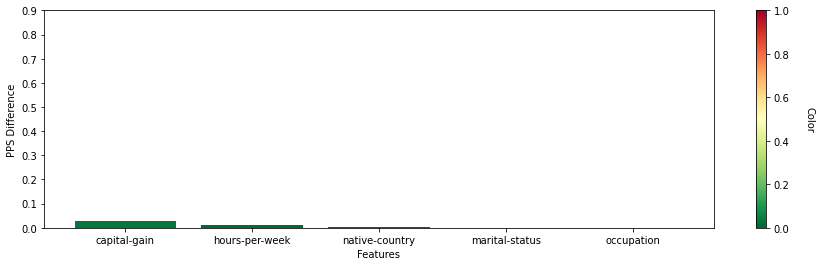

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to validation PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in validation can be explained by leakage in train that is not relevant to a new dataset.

In [22]:
DateIndexLessLeakageCheckSuite.run(model=model, train_dataset=train_ds, validation_dataset=val_ds, check_datasets_policy='both')

In [23]:
from mlchecks.suites import OverfitCheckSuite

In [24]:
OverfitCheckSuite.run(model=model, train_dataset=train_ds, validation_dataset=val_ds, check_datasets_policy='both')

ValueError: pos_label=1 is not a valid label. It should be one of [' <=50K', ' >50K']

#### This doesn't work, so we need to change label to 0 and 1 

(even other numeric values won't work , becuase of pos_label=1 being a default of some sklearn metrics)

In [25]:
replace_dict = {' <=50K': 0, ' >50K': 1} 

In [26]:
train_ds = Dataset(train_ds.data.replace({label_name: replace_dict}), label=label_name, cat_features=cat_features)
val_ds = Dataset(val_ds.data.replace({label_name: replace_dict}), label=label_name, cat_features=cat_features)

In [27]:
model = CatBoostClassifier(cat_features=cat_features)

In [28]:
model.fit(train_ds.data[features], train_ds.data[label_name], silent=True)

Overfit Suite

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

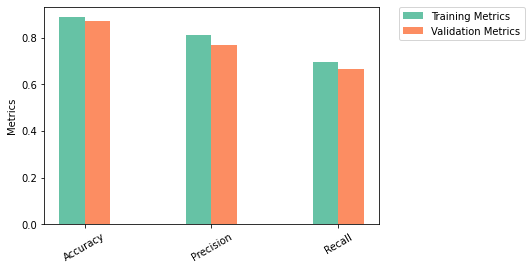

In [29]:
OverfitCheckSuite.run(model=model, train_dataset=train_ds, validation_dataset=val_ds, check_datasets_policy='both')

In [30]:
from mlchecks.suites import PerformanceCheckSuite

Performance Suite

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,0.888804
Precision,0.814109
Recall,0.697793


Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,0.873863
Precision,0.770111
Recall,0.664587


Confusion Matrix Report - Train Dataset

Return the confusion_matrix.

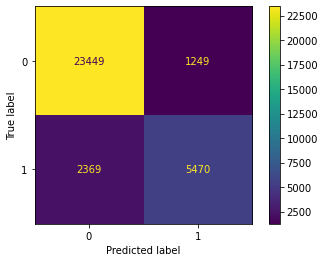

Confusion Matrix Report - Validation Dataset

Return the confusion_matrix.

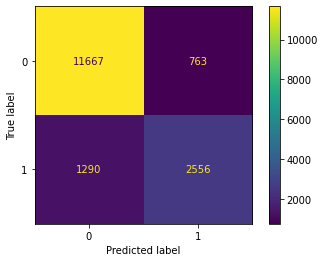

ROC Report - Train Dataset

Return the AUC for each class.

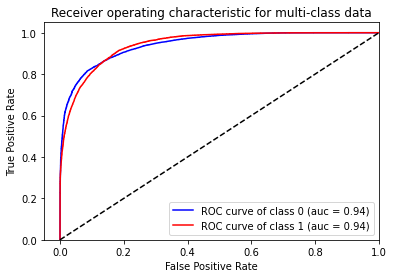

ROC Report - Validation Dataset

Return the AUC for each class.

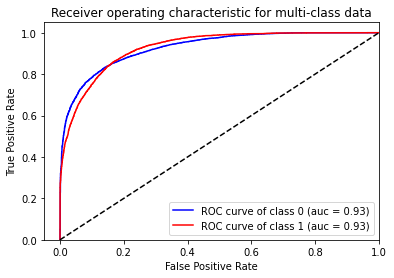

In [31]:
PerformanceCheckSuite.run(model=model, train_dataset=train_ds, validation_dataset=val_ds, check_datasets_policy='both')